In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [75]:
data = pd.read_csv('cleaned_data.csv')
data.head()

,Unnamed: 0,title,company_name,job_description,job_requirments,location,location_edited
0,0,Data & BI Analyst,Klivvr,"[We put our visionaries first. , We strive for...","['Identifying data sources', 'Analyzing data, ...",القاهرة قسم الزمالك مصر,"['Cairo', 'Section', 'Al Zamalek', 'Egypt']"
1,1,Data Analyst,Axis,"[Interpreting marketing data, analyzing result...","['Developing & implementing databases, data co...",القاهرة القاهرة مصر,"['Cairo', 'Cairo', 'Egypt']"
2,2,Reporting and Data Analyst,Property Finder,[The ideal candidate will use their passion fo...,['Graduated from Computer Science or Engineeri...,مصر,['Egypt']
3,3,Data Analyst,OLX Egypt,"[Accessing data, constructing and manipulating...","['Bachelor’s degree in statistics, mathematics...",القاهرة القاهرة مصر,"['Cairo', 'Cairo', 'Egypt']"
4,4,Business Analyst,Zoho,"[Define and plan project milestones, phases an...",not_found,القاهرة مصر,"['Cairo', 'Egypt']"


In [76]:
data = data.drop('Unnamed: 0', axis=1)

In [77]:
data.head()

,title,company_name,job_description,job_requirments,location,location_edited
0,Data & BI Analyst,Klivvr,"[We put our visionaries first. , We strive for...","['Identifying data sources', 'Analyzing data, ...",القاهرة قسم الزمالك مصر,"['Cairo', 'Section', 'Al Zamalek', 'Egypt']"
1,Data Analyst,Axis,"[Interpreting marketing data, analyzing result...","['Developing & implementing databases, data co...",القاهرة القاهرة مصر,"['Cairo', 'Cairo', 'Egypt']"
2,Reporting and Data Analyst,Property Finder,[The ideal candidate will use their passion fo...,['Graduated from Computer Science or Engineeri...,مصر,['Egypt']
3,Data Analyst,OLX Egypt,"[Accessing data, constructing and manipulating...","['Bachelor’s degree in statistics, mathematics...",القاهرة القاهرة مصر,"['Cairo', 'Cairo', 'Egypt']"
4,Business Analyst,Zoho,"[Define and plan project milestones, phases an...",not_found,القاهرة مصر,"['Cairo', 'Egypt']"


In [78]:
data.duplicated().sum()

7

In [79]:
data = data.drop_duplicates()
data.duplicated().sum()

0

### <center>EXtract most common titles </center>

In [80]:
data['title'].value_counts()[:10]

Data Analyst                               4
Software Quality Engineer                  3
Software Testing Engineer                  3
Data Scientist                             3
GRADUATE SOFTWARE ENGINEER - Dubai, UAE    2
Senior Quality Assurance Engineer          2
Data Engineer                              2
Software Test Engineer                     2
Software Quality Assurance Engineer        2
Senior Software Testing Engineer           1
Name: title, dtype: int64

In [81]:
data['title'].unique()

array(['Data & BI Analyst', 'Data Analyst', 'Reporting and Data Analyst',
       'Business Analyst', 'Data Analyst-Fintech', 'Senior Data Analyst',
       'Data Scientist', 'Head of Data Analytics - Cairo - Egypt',
       'corporate strategy business analyst ',
       'Discover Graduate Program - Business Intelligence',
       'Marsh MENA Graduate Development Program - Egypt', 'AI Engineer',
       'Business Research Analyst', 'Product Management Specialist',
       'Data Engineer',
       'CRM Retail Officer (Digital Banking & Marketing Division)',
       'Software Business Analyst',
       'Python Developer For sports statistics ',
       'AI Programming with Python',
       'Machine Learning & Data Analysis Graduate Intern',
       'Remote Python Developer Jobs',
       'Software Engineer Graduate Intern',
       'Python Developer with ERPNext and Frappe Experience',
       'Machine Learning Engineer',
       'Algorithm Development System Engineer',
       'AI/ML (Artificial Intelli

> We can collect these jobs to some common categories which are:
>> Data Analyst<br>
>> AI<br>
>> Python<br>
>> Machine Learning Engineer<br>
>> Business Analyst<br>
>> Software Test

>I will use FuzzyWuzzy to do this 

In [82]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

In [83]:
related = process.extract(query='Data Analyst', choices=data['title'], limit=9)
related

[('Data Analyst', 100, 1),
 ('Data Analyst', 100, 3),
 ('Data Analyst', 100, 5),
 ('Data Analyst', 100, 19),
 ('Data & BI Analyst', 95, 0),
 ('Reporting and Data Analyst', 90, 2),
 ('Data Analyst-Fintech', 90, 6),
 ('Senior Data Analyst', 90, 7),
 ('Head of Data Analytics - Cairo - Egypt', 86, 9)]

In [84]:
words = [i[0] for i in related]
words

['Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data & BI Analyst',
 'Reporting and Data Analyst',
 'Data Analyst-Fintech',
 'Senior Data Analyst',
 'Head of Data Analytics - Cairo - Egypt']

- Things to do:
    - Function to extract related words from a series
    - function to make replacement process for each columns

In [117]:
def select_related_words(pattern, col, limit):
    related = process.extract(query=pattern, choices=col, limit=limit)
    return related
    
def replacement(related, row_value, new_word, on_=0):
    if on_ == 0:
        words = [i[0] for i in related]
    else:
        words = related
    
    if row_value in words:
        return row_value.replace(row_value, new_word)
    else:
        return row_value

In [86]:
# test function
select_related_words('Data Analyst', data['title'], 10)

[('Data Analyst', 100, 1),
 ('Data Analyst', 100, 3),
 ('Data Analyst', 100, 5),
 ('Data Analyst', 100, 19),
 ('Data & BI Analyst', 95, 0),
 ('Reporting and Data Analyst', 90, 2),
 ('Data Analyst-Fintech', 90, 6),
 ('Senior Data Analyst', 90, 7),
 ('Head of Data Analytics - Cairo - Egypt', 86, 9),
 ('corporate strategy business analyst ', 86, 10)]

In [87]:
data['title'] = data['title'].apply(lambda x: replacement(related, x, 'Data Analyst'))

In [88]:
data['title'].value_counts()[:3]

Data Analyst                 9
Software Testing Engineer    3
Software Quality Engineer    3
Name: title, dtype: int64

In [89]:
related = select_related_words('AI', data['title'], 4)
related

[('AI Engineer', 90, 13),
 ('CRM Retail Officer (Digital Banking & Marketing Division)', 60, 17),
 ('AI Programming with Python', 60, 23),
 ('AI/ML (Artificial Intelligence/Machine Learning) Lead', 60, 35)]

In [90]:
data['title'] = data['title'].apply(lambda x: replacement(related, x, 'AI Engineer'))
data['title'].value_counts()[:4]

Data Analyst                 9
AI Engineer                  4
Data Scientist               3
Software Quality Engineer    3
Name: title, dtype: int64

In [91]:
related = select_related_words('Python', data['title'], 4)
related

[('Python Developer For sports statistics ', 90, 22),
 ('Remote Python Developer Jobs', 90, 26),
 ('Remote Backend Python Developer (2) Jobs', 90, 41),
 ('Python Developer with ERPNext and Frappe Experience', 60, 30)]

In [92]:
data['title'] = data['title'].apply(lambda x: replacement(related, x, 'Python Developer'))
data['title'].value_counts()[:6]

Data Analyst                 9
Python Developer             4
AI Engineer                  4
Data Scientist               3
Software Quality Engineer    3
Software Testing Engineer    3
Name: title, dtype: int64

In [93]:
related = select_related_words('Machine Learning', data['title'], 2)
related

[('Machine Learning & Data Analysis Graduate Intern', 90, 24),
 ('Machine Learning Engineer', 90, 31)]

In [94]:
data['title'] = data['title'].apply(lambda x: replacement(related, x, 'AI Engineer'))
data['title'].value_counts()[:6]

Data Analyst                 9
AI Engineer                  6
Python Developer             4
Data Scientist               3
Software Testing Engineer    3
Software Quality Engineer    3
Name: title, dtype: int64

In [96]:
related = select_related_words('Business Analyst', data['title'], 5)
related

[('Business Analyst', 100, 4),
 ('corporate strategy business analyst ', 90, 10),
 ('Software Business Analyst', 90, 18),
 ('Discover Graduate Program - Business Intelligence', 86, 11),
 ('Business Research Analyst', 86, 14)]

In [97]:
data['title'] = data['title'].apply(lambda x: replacement(related, x, 'Business Analyst'))
data['title'].value_counts()[:6]

Data Analyst                 9
AI Engineer                  6
Business Analyst             5
Python Developer             4
Data Scientist               3
Software Quality Engineer    3
Name: title, dtype: int64

In [104]:
related = select_related_words('Software Test', data['title'], 24)
related

[('Software Testing Engineer', 90, 44),
 ('Software Testing Engineer', 90, 46),
 ('Software Test Engineer | API Testing', 90, 49),
 ('Software Test Engineer', 90, 50),
 ('Software Testing Engineer', 90, 53),
 ('Senior Software Testing Engineer', 90, 56),
 ('Junior Software Tester', 90, 59),
 ('Software Test Engineer', 90, 60),
 ('Senior Software Tester', 90, 66),
 ('Software Engineer Graduate Intern', 86, 27),
 ('GRADUATE SOFTWARE ENGINEER - Dubai, UAE', 86, 39),
 ('GRADUATE SOFTWARE ENGINEER - Dubai, UAE', 86, 42),
 ('Software Quality Assurance Tester', 86, 43),
 ('Software Manual Testing Engineer', 86, 45),
 ('Software QA Engineer', 86, 47),
 ('Software QA Engineer - (Remote Job)', 86, 52),
 ('Software Quality Engineer', 86, 55),
 ('Software QC Engineer', 86, 57),
 ('Software Quality Assurance Engineer', 86, 61),
 ('Software Quality Engineer', 86, 62),
 ('Software Quality Engineer', 86, 64),
 ('Software Quality Assurance Engineer', 86, 65),
 ('QA Software Testing', 81, 51),
 ('QA Tes

In [105]:
data['title'] = data['title'].apply(lambda x: replacement(related, x, 'Software Testing Engineer'))
data['title'].value_counts()[:6]

Software Testing Engineer    24
Data Analyst                  9
AI Engineer                   6
Business Analyst              5
Python Developer              4
Data Scientist                3
Name: title, dtype: int64

In [106]:
data['title'].value_counts()

Software Testing Engineer                          24
Data Analyst                                        9
AI Engineer                                         6
Business Analyst                                    5
Python Developer                                    4
Data Scientist                                      3
Data Engineer                                       2
Senior Quality Assurance Engineer                   2
Marsh MENA Graduate Development Program - Egypt     1
Product Management Specialist                       1
Algorithm Development System Engineer               1
5G Senior Data Scientist                            1
Mid Tester                                          1
Name: title, dtype: int64

In [108]:
related = select_related_words('Data Scientist', data['title'], 4)
related

[('Data Scientist', 100, 8),
 ('Data Scientist', 100, 20),
 ('Data Scientist', 100, 36),
 ('5G Senior Data Scientist', 90, 38)]

In [109]:
data['title'] = data['title'].apply(lambda x: replacement(related, x, 'Data Scientist'))
data['title'].value_counts()

Software Testing Engineer                          24
Data Analyst                                        9
AI Engineer                                         6
Business Analyst                                    5
Data Scientist                                      4
Python Developer                                    4
Data Engineer                                       2
Senior Quality Assurance Engineer                   2
Marsh MENA Graduate Development Program - Egypt     1
Product Management Specialist                       1
Algorithm Development System Engineer               1
Mid Tester                                          1
Name: title, dtype: int64

> Let's change some categories manual

In [119]:
lst = ['Mid Tester', 'Senior Quality Assurance Engineer']
data['title'] = data['title'].apply(lambda x : replacement(lst, x, 'Software Testing Engineer', on_=1))
data['title'].value_counts()

Software Testing Engineer                          27
Data Analyst                                        9
AI Engineer                                         6
Business Analyst                                    5
Data Scientist                                      4
Python Developer                                    4
Data Engineer                                       2
Marsh MENA Graduate Development Program - Egypt     1
Product Management Specialist                       1
Algorithm Development System Engineer               1
Name: title, dtype: int64

In [120]:
lst = ['Marsh MENA Graduate Development Program - Egypt', 'Product Management Specialist', 'Algorithm Development System Engineer']
data['title'] = data['title'].apply(lambda x : replacement(lst, x, 'Other', on_=1))
data['title'].value_counts()

Software Testing Engineer    27
Data Analyst                  9
AI Engineer                   6
Business Analyst              5
Data Scientist                4
Python Developer              4
Other                         3
Data Engineer                 2
Name: title, dtype: int64

> Now we have a specific categories and it's more cleaned.

### <center>Location and extract city </center>

In [124]:
data['location_edited'].value_counts()

['Cairo', 'Cairo', 'Egypt']                                     30
['Cairo', 'Egypt']                                              12
['Egypt']                                                        5
['Cairo', 'Cairo', 'Judaidah', 'Egypt']                          3
['Jizeh', 'Section', 'Second', '6', 'October', 'Egypt']          2
['Cairo', 'Section', 'Maadi', 'Egypt']                           2
['Cairo', 'Section', 'Second', 'Cairo', 'Judaidah', 'Egypt']     2
['Cairo', 'Section', 'Al Zamalek', 'Egypt']                      1
['Jizeh', 'October', '6', 'Egypt']                               1
['Alexandria', 'Egypt']                                          1
['Jizeh', 'Jizeh', 'Egypt']                                      1
Name: location_edited, dtype: int64

In [180]:
def clean_and_extract(row_value):
    import re
    
    x = re.sub('[\[\]]', '',string=row_value)
    lst = re.sub('[\']', '',x).split(',')
    return lst
    

In [184]:
data['location_edited'] = data['location_edited'].apply(clean_and_extract)

In [191]:
data['location_edited']

0                [Cairo,  Section,  Al Zamalek,  Egypt]
1                               [Cairo,  Cairo,  Egypt]
2                                               [Egypt]
3                               [Cairo,  Cairo,  Egypt]
4                                       [Cairo,  Egypt]
5                               [Cairo,  Cairo,  Egypt]
6                               [Cairo,  Cairo,  Egypt]
7                               [Cairo,  Cairo,  Egypt]
8                               [Cairo,  Cairo,  Egypt]
9                               [Cairo,  Cairo,  Egypt]
10                                      [Cairo,  Egypt]
11                                              [Egypt]
12                              [Cairo,  Cairo,  Egypt]
13                        [Jizeh,  October,  6,  Egypt]
14                              [Cairo,  Cairo,  Egypt]
15                   [Cairo,  Cairo,  Judaidah,  Egypt]
16                              [Cairo,  Cairo,  Egypt]
17                                      [Cairo, 

In [193]:
data['city'] = data['location_edited'].apply(lambda x: x[0] if len(x)>=2 else np.nan)

In [244]:
data['city'] = data['city'].str.replace('Jizeh', 'Giza')

In [245]:
data.head()

,title,company_name,job_description,job_requirments,location,location_edited,city
0,Data Analyst,Klivvr,"[We put our visionaries first. , We strive for...","['Identifying data sources', 'Analyzing data, ...",القاهرة قسم الزمالك مصر,"[Cairo, Section, Al Zamalek, Egypt]",Cairo
1,Data Analyst,Axis,"[Interpreting marketing data, analyzing result...","['Developing & implementing databases, data co...",القاهرة القاهرة مصر,"[Cairo, Cairo, Egypt]",Cairo
2,Data Analyst,Property Finder,[The ideal candidate will use their passion fo...,['Graduated from Computer Science or Engineeri...,مصر,[Egypt],NaN
3,Data Analyst,OLX Egypt,"[Accessing data, constructing and manipulating...","['Bachelor’s degree in statistics, mathematics...",القاهرة القاهرة مصر,"[Cairo, Cairo, Egypt]",Cairo
4,Business Analyst,Zoho,"[Define and plan project milestones, phases an...",not_found,القاهرة مصر,"[Cairo, Egypt]",Cairo


## <center> <font color='brown'>Visualization </center>

In [246]:
data['city'].value_counts()

Cairo         50
Giza           4
Alexandria     1
Name: city, dtype: int64

> To put city on the map, we need it's latitude and longitude

In [230]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [233]:
city ="Cairo"
country ="Egypt"
loc = geolocator.geocode(city+','+ country)
print("latitude is :" ,loc.latitude,"\nlongtitude is:" ,loc.longitude)
lat_cairo = loc.latitude
long_cairo = loc.longitude

latitude is : 30.0443879 
longtitude is: 31.2357257


In [234]:
city ="Alexandria"
country ="Egypt"
loc = geolocator.geocode(city+','+ country)
print("latitude is :" ,loc.latitude,"\nlongtitude is:" ,loc.longitude)
lat_alex = loc.latitude
long_alex = loc.longitude

latitude is : 31.199004 
longtitude is: 29.894378


In [243]:
city ="Giza"
country ="Egypt"
loc = geolocator.geocode(city+','+ country)
print("latitude is :" ,loc.latitude,"\nlongtitude is:" ,loc.longitude)
lat_giza = loc.latitude
long_giza = loc.longitude

latitude is : 29.9870753 
longtitude is: 31.2118063


In [236]:
geolocator.geocode(str(lat_alex)+","+str(long_alex))

Location(15, شارع عباس محمود العقاد, المنشية الكبري, الإسكندرية, 21519, مصر, (31.1989614, 29.8945861, 0.0))

#### Another Way

In [226]:
import requests
import urllib.parse

city = "Cairo"
country = "Egypt"
url = "https://nominatim.openstreetmap.org/?addressdetails=1&q=" + city + "+" + country +"&format=json&limit=1"

response = requests.get(url).json()
print(response[0]["lat"])
print(response[0]["lon"])

30.0443879
31.2357257


In [227]:
response

[{'place_id': 338897607,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'node',
  'osm_id': 271613766,
  'boundingbox': ['29.8843879', '30.2043879', '31.0757257', '31.3957257'],
  'lat': '30.0443879',
  'lon': '31.2357257',
  'display_name': 'القاهرة, 11519, مصر',
  'class': 'place',
  'type': 'city',
  'importance': 0.6960286135601557,
  'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_place_city.p.20.png',
  'address': {'city': 'القاهرة',
   'state': 'القاهرة',
   'ISO3166-2-lvl4': 'EG-C',
   'postcode': '11519',
   'country': 'مصر',
   'country_code': 'eg'}}]

In [247]:
data['city'].unique()

array(['Cairo', nan, 'Giza', 'Alexandria'], dtype=object)

In [248]:
def latitude_longitude(row_value, on=0):
    # Latitude
    if on==0:
        if row_value=='Cairo':
            return lat_cairo
        elif row_value=='Alexandria':
            return lat_alex
        elif row_value=='Giza':
            return lat_giza
        else:
            return np.nan
    
    # Longitude
    else:
        if row_value=='Cairo':
            return long_cairo
        elif row_value=='Alexandria':
            return long_alex
        elif row_value=='Giza':
            return long_giza
        else:
            return np.nan

In [254]:
data['latitude'] = data['city'].apply(latitude_longitude)
data['longitude'] = data['city'].apply(lambda x: latitude_longitude(x , on=1))

In [255]:
data.head(3)

,title,company_name,job_description,job_requirments,location,location_edited,city,latitude,longitude
0,Data Analyst,Klivvr,"[We put our visionaries first. , We strive for...","['Identifying data sources', 'Analyzing data, ...",القاهرة قسم الزمالك مصر,"[Cairo, Section, Al Zamalek, Egypt]",Cairo,30.044388,31.235726
1,Data Analyst,Axis,"[Interpreting marketing data, analyzing result...","['Developing & implementing databases, data co...",القاهرة القاهرة مصر,"[Cairo, Cairo, Egypt]",Cairo,30.044388,31.235726
2,Data Analyst,Property Finder,[The ideal candidate will use their passion fo...,['Graduated from Computer Science or Engineeri...,مصر,[Egypt],NaN,NaN,NaN


In [256]:
import plotly.express as px

In [283]:
data['city'].value_counts().values

array([50,  4,  1], dtype=int64)

In [287]:
df = data.dropna()

In [295]:
fig = px.scatter_geo(df, lat='latitude',
              lon='longitude', 
              hover_name='city',
              color='city',
                    )
fig.update_layout(title = 'Jobs Location', title_x=0.5)

In [308]:
df.columns

Index(['title', 'company_name', 'job_description', 'job_requirments',
       'location', 'location_edited', 'city', 'latitude', 'longitude'],
      dtype='object')

Text(0.5, 1.0, 'City')

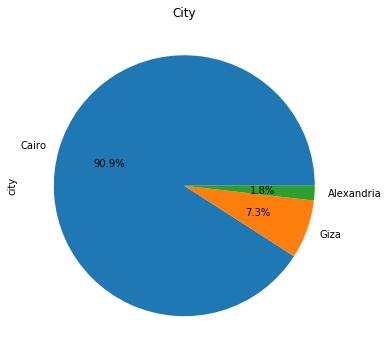

In [329]:
df['city'].value_counts().plot.pie(autopct='%1.1f%%');
plt.title('City')

Text(0.5, 1.0, 'Common Jobs')

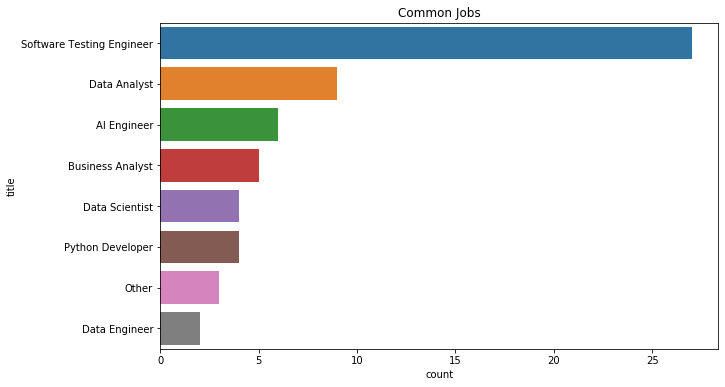

In [332]:
sns.countplot(data=data, y='title', order=data['title'].value_counts().index);
plt.title('Common Jobs')